<a id='overview'></a>
## StackOverflow Developer Survey 2020 Analysis

### Overview
For ten years now, StackOverflow  has been conducting an annual Developer Survey. Survey results have been made publicly available, and they have been analyzed from many different corners to bring light into a developer profile and trends in the industry. 

As a developer, I am a frequent user of StackOverflow, and always find it very helpful. I have specific questions that I want to find out answers to by analysing the latest Developer Survey result as of now (October, 2020). This survey was conducted in February 2020, right before the whole world entered the Covid-19 quarantine. 

### Questions to explore:
1. What is the most popular database in 2020?
2. What is the profile of StackOverflow frequent users?
3. What is the most important job factor for developers in 2020?

My analysis process consists of three parts: 
1. **Data Exploration** - where I explore the data set and its attributes,
2. **Data Preparation** - where I clean, tidy and transform the data set,
3. **Data Analysis** - where I conduct analysis and find answers to my research questions.

### Libraries used
Pandas, NumPy, MatPlotLib, Seaborn and Warnings.

<a id='top'></a>
### Table of Contents
1. [Overview](#overview)
2. [Data Exploration](#data_exploration) 
2. [Data Preparation](#data_preparation) 
3. [Data Analysis](#data_analysis)
4. [Conclusion](#conclusion) 
5. [Acknowledgements](#acknowledgements)

<a id='data_exploration'></a>
## Data Exploration

In [54]:
# importing packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')
%matplotlib inline

#### 1. Gather data

In [55]:
#importing survey results to a pandas dataframe
df = pd.read_csv('survey_results_public.csv')

In [56]:
# taking a peak into the dataframe
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [57]:
df.shape 

(64461, 61)

In [58]:
print('There are', df.shape[0], 'rows in the StackOverflow Developer Survey 2020.')

There are 64461 rows in the StackOverflow Developer Survey 2020.


In [59]:
# summary statistics of numeric fields
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [60]:
# list of all fields
list(df.columns.values)

['Respondent',
 'MainBranch',
 'Hobbyist',
 'Age',
 'Age1stCode',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWCollabToolsWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWEdImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWLearn',
 'NEWOffTopic',
 'NEWOnboardGood',
 'NEWOtherComms',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'NEWPurpleLink',
 'NEWSOSites',
 'NEWStuck',
 'OpSys',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseWhat',
 'Sexuality',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'SurveyEase',
 'SurveyLength',
 'Trans',
 'UndergradMajor',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WelcomeChange',
 'W

> Below I will explore fields relevant to my questions.

In [61]:
df['DatabaseWorkedWith'].value_counts()

MySQL                                                                       3827
Microsoft SQL Server                                                        3298
PostgreSQL                                                                  1937
SQLite                                                                      1313
Microsoft SQL Server;MySQL                                                  1158
                                                                            ... 
Couchbase;Elasticsearch;MongoDB;Oracle;PostgreSQL                              1
Elasticsearch;MariaDB;Microsoft SQL Server;Oracle;PostgreSQL;SQLite            1
Cassandra;Elasticsearch;Firebase;MariaDB;MySQL;SQLite                          1
Cassandra;Couchbase;Elasticsearch;MongoDB;Oracle;PostgreSQL;Redis;SQLite       1
Couchbase;MariaDB;PostgreSQL;SQLite                                            1
Name: DatabaseWorkedWith, Length: 2808, dtype: int64

>  Seems like multiple values could be selected in **DatabaseWorkedWith** column. If I want to use this column for analysis, it would be a good idea to split each value. 

In [62]:
df['DatabaseDesireNextYear'].unique()

array(['Microsoft SQL Server', nan, 'MySQL;PostgreSQL', ...,
       'Elasticsearch;MySQL;Oracle;Redis;SQLite',
       'Couchbase;DynamoDB;Elasticsearch;Firebase;IBM DB2;Oracle;PostgreSQL',
       'Elasticsearch;IBM DB2;Oracle'], dtype=object)

> **DatabaseDesireNextYear** column values need to be separated.

In [63]:
df['SOVisitFreq'].value_counts()

Daily or almost daily                                 17372
Multiple times per day                                16273
A few times per week                                  13493
A few times per month or weekly                        7901
Less than once per month or monthly                    1739
I have never visited Stack Overflow (before today)      192
Name: SOVisitFreq, dtype: int64

> Althouth a bit long, values of **SOVisitFreq** column does not require a transformation.

In [64]:
df['Gender'].value_counts()

Man                                                            46013
Woman                                                           3844
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         76
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

> **Gender** column values either need to be separated or simplified for better or easier analysis.

In [65]:
df['Age'].value_counts()

25.0    2693
28.0    2412
30.0    2406
26.0    2391
27.0    2338
        ... 
23.8       1
95.0       1
31.5       1
20.5       1
16.5       1
Name: Age, Length: 110, dtype: int64

In [66]:
print('Min val of age:', df['Age'].min(), ' and max val of age:', df['Age'].max())

Min val of age: 1.0  and max val of age: 279.0


> **Age** column values seem to be unreliable as 1 year olds do not use StackOverflow, and humans can not live for 279 year. For analysis purposes, I may need to get a specific age group, for example 15 - 60. 

In [67]:
df['YearsCode'].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [68]:
df['YearsCodePro'].unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

> **YearsCode** and **YearsCodePro** column values are cleaner, but I may need to remove non-numeric values and convert the column type to numeric. 

In [69]:
df['JobFactors'].value_counts().nlargest(10)

Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Remote work options                                               2777
Languages, frameworks, and other technologies I’d be working with;Office environment or company culture;Opportunities for professional development                   2570
Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Office environment or company culture                             2508
Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Opportunities for professional development                        1666
Flex time or a flexible schedule;Office environment or company culture;Opportunities for professional development                                                    1650
Flex time or a flexible schedule;Remote work options;Office environment or company culture                                                            

> **JobFactors** column values need to be separated.

In [70]:
df['MainBranch'].value_counts()

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

In [71]:
df['Hobbyist'].value_counts()

Yes    50388
No     14028
Name: Hobbyist, dtype: int64

In [72]:
df['Country'].value_counts()

United States       12469
India                8403
United Kingdom       3896
Germany              3890
Canada               2191
                    ...  
Nauru                   1
Mali                    1
Kiribati                1
Gabon                   1
Marshall Islands        1
Name: Country, Length: 183, dtype: int64

In [73]:
df['JobSeek'].value_counts()

I’m not actively looking, but I am open to new opportunities    29776
I am not interested in new job opportunities                    13001
I am actively looking for a job                                  8950
Name: JobSeek, dtype: int64

>  **MainBranch**, **Country**, **Hobbyist** and **Jobseek** column values are clean, and do not need a transformation.

[Back to top](#top)

<a id='data_preparation'></a>
## Data Preparation

> In this section, I will prepare the data to perform analysis.  I will wrangle the data by transforming the shape, columns, rows and values when necessary.

#### 2. Cleaning and tidying data

> Since I do not need all the columns for my analysis purposes, I will simplify the dataframe with only columns that interest me to find answers to the questions of research. 

In [74]:
# Drop unnecessary columns
df = df[['Respondent', 'Gender', 'Age', 'JobFactors','DatabaseWorkedWith', 'DatabaseDesireNextYear', 
                  'YearsCode', 'YearsCodePro', 'SOVisitFreq','MainBranch',  'Hobbyist','Country', 'JobSeek']]
df.head()

,Respondent,Gender,Age,JobFactors,DatabaseWorkedWith,DatabaseDesireNextYear,YearsCode,YearsCodePro,SOVisitFreq,MainBranch,Hobbyist,Country,JobSeek
0,1,Man,NaN,"Languages, frameworks, and other technologies ...",Elasticsearch;Microsoft SQL Server;Oracle,Microsoft SQL Server,36,27,Multiple times per day,I am a developer by profession,Yes,Germany,I am not interested in new job opportunities
1,2,NaN,NaN,NaN,NaN,NaN,7,4,Multiple times per day,I am a developer by profession,No,United Kingdom,I am not interested in new job opportunities
2,3,NaN,NaN,NaN,NaN,NaN,4,NaN,Daily or almost daily,I code primarily as a hobby,Yes,Russian Federation,NaN
3,4,Man,25.0,Flex time or a flexible schedule;Office enviro...,NaN,NaN,7,4,Multiple times per day,I am a developer by profession,Yes,Albania,"I’m not actively looking, but I am open to new..."
4,5,Man,31.0,NaN,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,15,8,A few times per month or weekly,"I used to be a developer by profession, but no...",Yes,United States,NaN


> **Age**, **YearsCode** and **YearsCodePro** columns are numerical, and the rest of the columns are categorical in my dataset. If I were to make a prediction based on my data, I would use a machine learning technique. For a machine learning model, categorical fields need to be transformated into numeric fields (1,0) by creating dummie variables. NaN values would need to be inputed or dropped. However, my research questions can be answered without any machine learning technique.

In [75]:
# number of null values before cleaning
df.isnull().sum()

Respondent                    0
Gender                    13904
Age                       19015
JobFactors                15112
DatabaseWorkedWith        14924
DatabaseDesireNextYear    20391
YearsCode                  6777
YearsCodePro              18112
SOVisitFreq                7491
MainBranch                  299
Hobbyist                     45
Country                     389
JobSeek                   12734
dtype: int64

In [76]:
# number of records before cleaning
df.shape

(64461, 13)

In [77]:
# checking the data type of Age column
df['Age'].dtype

dtype('float64')

In [78]:
# dropping rows where Age is above 85 and below 8. I am not sure if 8 years olds use StackOverflow, 
# but I had to come up with an arbitrary number.
df.drop(df[df['Age'] > 85].index, inplace = True) 
df.drop(df[df['Age'] < 8].index, inplace = True) 

In [79]:
# number of records after cleaning
df.shape

(64431, 13)

In [80]:
# simplifying Gender field
gender_conditions = [(df['Gender'] == 'Man'),
                         (df['Gender'] == 'Woman'),
                         (pd.isnull(df['Gender']) == True),
                         (df['Gender'] != 'Man') & (df['Gender'] != 'Woman') 
                         & (pd.isnull(df['Gender']) == False)]

gender_cats = ['Male', 'Female', 'No Response','Other']

df['Gender'] = np.select(gender_conditions, gender_cats, default = np.NaN)
df['Gender'].value_counts()

Male           46001
No Response    13896
Female          3841
Other            693
Name: Gender, dtype: int64

> There are many variety of combinations for gender. For simplicity, I grouped them by Man, Woman and Other. I also converted null values to No Response group. Since it is Gender, I think other inputation methods would not make sense in this case. 

In [81]:
# function to separate and pivot values in a column
def separate(val):
    """Create a new dataframe that splits the values of multi-selection column cell value into individual selections and 
    places each selection value on a separate row. 
    
    Args:
    df: Pandas Series object containing the multi-selection column values.
       
    Returns:
    out_df: dataframe. New dataframe giving split values of values.
    """
    values = {}
    # checking if the column value is dtype of string
    if not isinstance(val, str) :
        return {}
    # it splits column value (str) with the separator and adds to values object with count
    for l in val.split(';'):
        values[l] = 1;
    return values

> Above function is an adjusted form of a function written [here](https://github.com/kedevked/stackoverflow2018-survey/blob/master/stackoverflow_analysis.ipynb).

In [82]:
def apply_separate_func(column):
    """ Create a new dataframe that applies separate() function above to each column value using lambda. 
    
    Args: Pandas Series object containing multi-selection column values and string containing name of vals.
    
    Returns: 
    new_df: dataframe. New dataframe appying separate() function to column values.
    """
    # separate and pivot DatabaseWorkedWith column values and save in a dataframe
    new_df = column.apply(lambda x: pd.Series(separate(x)))
    
    # print out number of unique values in the column
    print("There are {} unique values.".format(new_df.shape[1]))
    
    return new_df

In [83]:
pop_dbs = apply_separate_func(df['DatabaseWorkedWith']);
pop_dbs.head()

There are 14 unique values.


,Elasticsearch,Microsoft SQL Server,Oracle,MySQL,PostgreSQL,Redis,SQLite,MariaDB,Firebase,MongoDB,IBM DB2,DynamoDB,Cassandra,Couchbase
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Beause I have pivoted the dataframe, it will have many null values. I could fill them with 0s. However, for my analysis, null values will not be a problem. Because I am interested in the count of each database occurance, and only non-null numeric values will be counted.

In [84]:
# separate and pivot DatabaseDesireNextYear column values and save in a dataframe
desired_dbs = apply_separate_func(df['DatabaseDesireNextYear'])
desired_dbs.head()

There are 14 unique values.


,Microsoft SQL Server,MySQL,PostgreSQL,MongoDB,Firebase,Cassandra,Elasticsearch,MariaDB,Redis,SQLite,Oracle,DynamoDB,Couchbase,IBM DB2
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# separte and pivot JobFactors column values and save in a data frame
job_factors = apply_separate_func(df['JobFactors'])
job_factors.head()

There are 11 unique values.


,"Languages, frameworks, and other technologies I’d be working with",Remote work options,Opportunities for professional development,Flex time or a flexible schedule,Office environment or company culture,Diversity of the company or organization,Family friendliness,How widely used or impactful my work output would be,Industry that I’d be working in,Financial performance or funding status of the company or organization,Specific department or team I’d be working on
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> I have to do some transformation in **YearsCode** and **YearsCodePro** columns. To get rid of string values, I will replace them with numeric values. **YearsCode** column has null values, and I will fill them with average of all responders years of code. 

In [86]:
# checking for null values
df['YearsCode'].isnull().sum(), df['YearsCodePro'].isnull().sum()

(6777, 18099)

In [87]:
# replacing string values to numeric
df['YearsCode'].replace('Less than 1 year', 0, inplace=True)
df['YearsCode'].replace('More than 50 years', 55, inplace=True) 
df['YearsCodePro'].replace('Less than 1 year', 0, inplace=True)
df['YearsCodePro'].replace('More than 50 years', 55, inplace=True) 

In [88]:
# checking for column data types
df['YearsCode'].dtype , df['YearsCodePro'].dtype

(dtype('O'), dtype('O'))

> I spent some time thinking what would work best for filling null values in these two numeric columns. Since null values mean that people declined to respond, ideally inputing averages of each column would be a best method. However, because both columns are of datatype string, I had to convert them to an integer datatype. In order to convert them to an integer datatype, I had to deal with null values first. I did not want to distort the data with inputing some arbitrary integer for null values, because average would be calculated based on them as well. Therefore, I chose to forward fill method. Because last four entries were null, I did not use back fill method.

In [89]:
# filling null values with forward fill 
df['YearsCode'].ffill(inplace=True)
df['YearsCodePro'].ffill(inplace=True)

In [90]:
# checking for null values after ffill
df['YearsCode'].isnull().sum(), df['YearsCodePro'].isnull().sum()

(0, 0)

In [91]:
# converting column datatype to integer
df['YearsCode'] = df['YearsCode'].astype(int)
df['YearsCodePro'] = df['YearsCodePro'].astype(int)

In [92]:
# checking column data type after casting
df['YearsCode'].dtype, df['YearsCodePro'].dtype

(dtype('int32'), dtype('int32'))

In [93]:
# create a subset of StackOverflow frequent-users
frequent_users = df[(df['SOVisitFreq'] == 'Multiple times per day') |  (df['SOVisitFreq'] == 'Daily or almost daily')]
frequent_users.head(3)

,Respondent,Gender,Age,JobFactors,DatabaseWorkedWith,DatabaseDesireNextYear,YearsCode,YearsCodePro,SOVisitFreq,MainBranch,Hobbyist,Country,JobSeek
0,1,Male,NaN,"Languages, frameworks, and other technologies ...",Elasticsearch;Microsoft SQL Server;Oracle,Microsoft SQL Server,36,27,Multiple times per day,I am a developer by profession,Yes,Germany,I am not interested in new job opportunities
1,2,No Response,NaN,NaN,NaN,NaN,7,4,Multiple times per day,I am a developer by profession,No,United Kingdom,I am not interested in new job opportunities
2,3,No Response,NaN,NaN,NaN,NaN,4,4,Daily or almost daily,I code primarily as a hobby,Yes,Russian Federation,NaN


> I will use the **frequent_users** data subset when drawing a profile of a StackOverflow user.

[Back to top](#top)

<a id='data_analysis'></a>
## Data Analysis

> In this section, I find answers to my questions by analyzing the data. Vizualizing the data will help me to find accurate answers. 

#### 3. Analyzing and visualizing data

### 1. What is the most popular database in 2020?

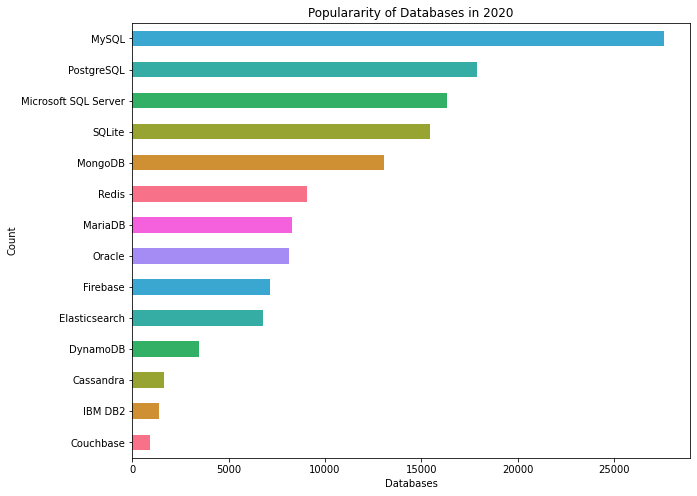

In [94]:
# Number of users for databases desired next year
ax = pop_dbs.sum().sort_values(ascending=True).plot(kind="barh", figsize=(10, 8), color=sns.color_palette("husl", 8));
ax.set_xlabel("Databases")
ax.set_ylabel("Count")
ax.set_title('Populararity of Databases in 2020');

> MysQL, PostgreSQL, Microsoft SQL Server are leading the way. MySQL and PostgreSQL are both open source, and one of the well-maintained database systems. SQLite, a lightweight database system used mostly with light weight web applications is close to the top. MongoDB, a NoSQL database system that is used mostly for big data, is on the rise.

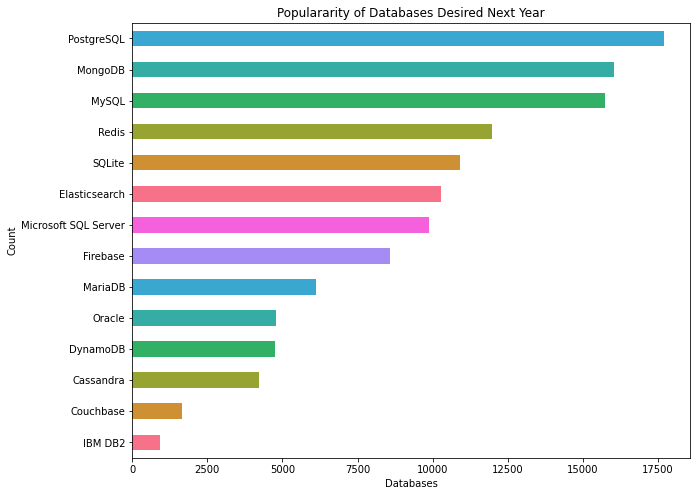

In [95]:
# Number of users for databases desired next year
ax = desired_dbs.sum().sort_values(ascending=True).plot(kind="barh", figsize=(10, 8), color=sns.color_palette("husl", 8));
ax.set_xlabel("Databases")
ax.set_ylabel("Count")
ax.set_title('Populararity of Databases Desired Next Year');

> I also investigated what databases are desired by developers for next year. It seems like the popularity of PostgreSQL and MongoDB will continue. Redis, SQLite and Elasticsearch are joining the higher ranks next year.

### 2. What is the profile of StackOverflow frequent users?

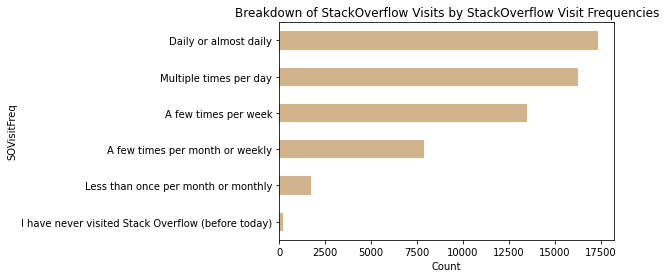

In [96]:
df.groupby(['SOVisitFreq'])['YearsCode'].count().sort_values(ascending=True).plot(kind='barh', color='tan');
plt.xlabel('Count');
plt.title('Breakdown of StackOverflow Visits by StackOverflow Visit Frequencies');

> Developers visit StackOverflow in different frequencies. It looks like most respondent developers use the site frequently.

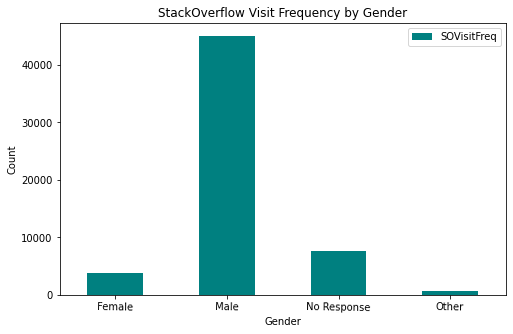

In [97]:
df[['SOVisitFreq', 'Gender']].groupby(['Gender']).count().plot(kind="bar",  figsize=(8,5),color='teal');
plt.title('StackOverflow Visit Frequency by Gender');
plt.ylabel('Count');
plt.xticks(rotation=-1);

> The survey results show a huge gender gap between men and women. This is the distribution of people who responded to the question about gender.

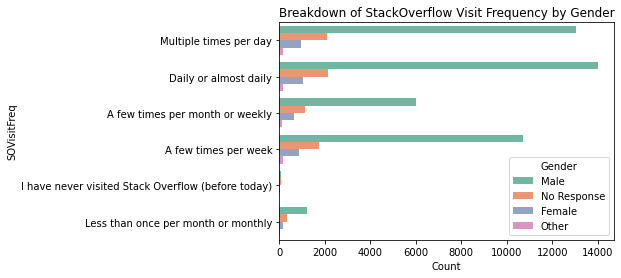

In [98]:
# Multi-bar Plot
sns.countplot(y="SOVisitFreq", hue="Gender", data=df, palette="Set2")
plt.xlabel("Count");
plt.title('Breakdown of StackOverflow Visit Frequency by Gender');

> I investigated the distribution of StackOverflow visit frequency by gender. Not surprisingly, men use StackOverflow more than women.

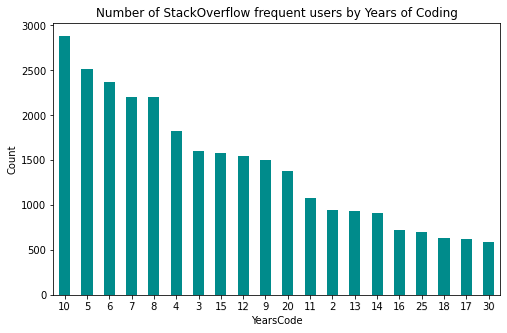

In [99]:
frequent_users.groupby(['YearsCode'])['SOVisitFreq'].count().sort_values(ascending=False).head(20).plot(kind='bar', \
                                                                             figsize=(8, 5), color='darkcyan');
plt.xticks(rotation=-1);
plt.ylabel('Count');
plt.title('Number of StackOverflow frequent users by Years of Coding');

> For better analysis, I zoomed into respondents who visit StackOverflow multiple times per day or Daily or almost daily. I will call them StackOverflow frequent users.

> It looks like developers with ten years of coding experience are StackOverflow star users. We can conclude that developers with four to fifteen years of coding experience visit the site most. On the contrary, developers with more than fifteen years of experience tend to use the site less.

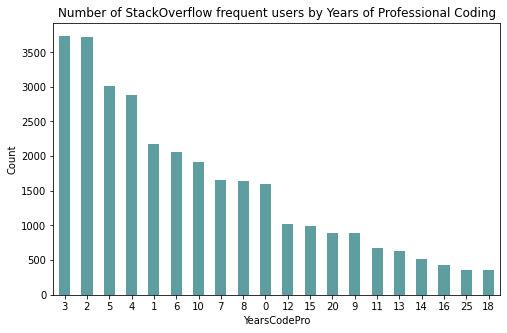

In [100]:
frequent_users.groupby(['YearsCodePro'])['SOVisitFreq'].count().sort_values(ascending=False).head(20).plot(kind='bar',\
                                                                                        figsize=(8, 5), color='cadetblue');
plt.xticks(rotation=-1);
plt.ylabel('Count');
plt.title('Number of StackOverflow frequent users by Years of Professional Coding');

> I investigated if there is any difference in StackOverflow usage between developers who have coding experience in general and developers who code professionally. It turns out developers with one to five years of professional coding experience use the site most. It may suggest that developers tend to have a few years of coding experience before they start coding as a job. Similar to the above chart, more years of professional coding meaning lesser use of StackOverflow.

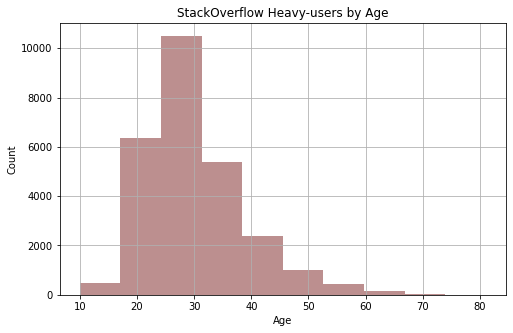

In [101]:
frequent_users['Age'].hist(figsize= (8, 5), color='rosybrown');
plt.title('StackOverflow Heavy-users by Age');
plt.xlabel('Age');
plt.ylabel('Count');

> StackOverflow frequent users are young. Developers between twenty five and thirty two contribute to the most of the traffic to the site.

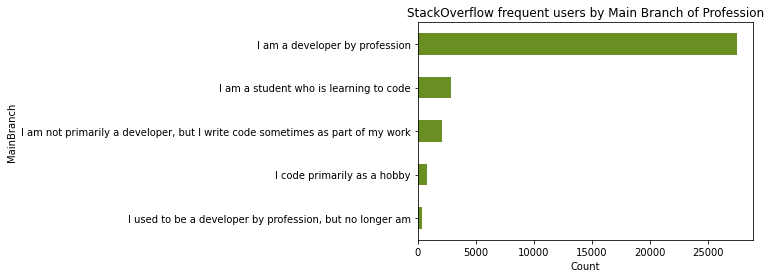

In [102]:
frequent_users.groupby(['MainBranch'])['SOVisitFreq'].count().sort_values(ascending=True).plot(kind='barh', \
                                                                                            color='olivedrab');
plt.title('StackOverflow frequent users by Main Branch of Profession');
plt.xlabel('Count');

> StackOverflow frequent users are developers by profession. This does not come surprising as we have discovered this insight from the previous charts.

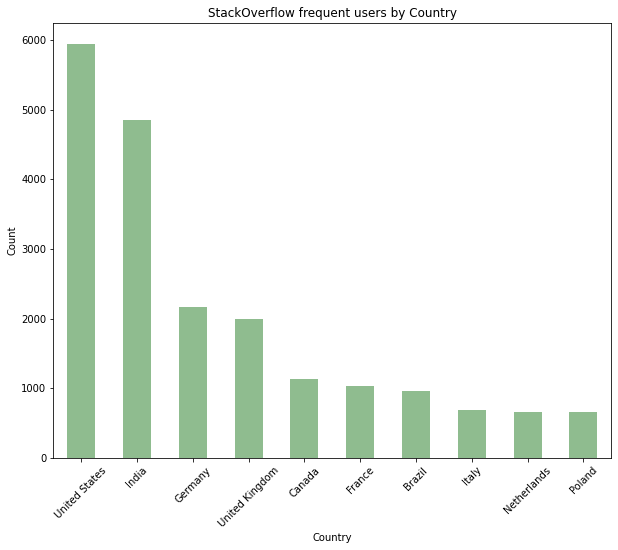

In [103]:
frequent_users.groupby(['Country'])['SOVisitFreq'].count().sort_values(ascending=False).head(10).plot(kind='bar',\
                                                                                    figsize=(10,8), color='darkseagreen');
plt.xticks(rotation=45);
plt.xlabel('Country');
plt.ylabel('Count');
plt.title('StackOverflow frequent users by Country');

> StackOverflow frequent users are from United States, India, Germany, and the United Kingdom. It is interesting insight not to find China in this trend.

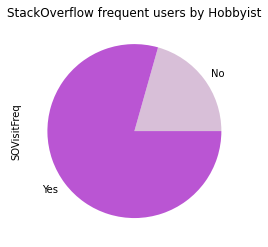

In [104]:
frequent_users.groupby(['Hobbyist'])['SOVisitFreq'].count().plot(kind='pie', colors=['thistle','mediumorchid']);
plt.title('StackOverflow frequent users by Hobbyist');

> StackOverflow frequent users are hobbyist coders on top of their developer profession.

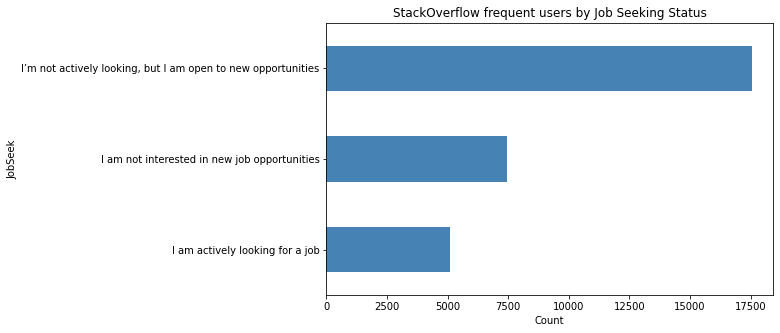

In [105]:
frequent_users.groupby(['JobSeek'])['SOVisitFreq'].count().sort_values(ascending=True).plot(kind='barh', \
                                                                        color='steelblue', figsize=(8,5));
plt.title('StackOverflow frequent users by Job Seeking Status');
plt.xlabel('Count');

> Most of StackOverflow frequent users are not looking for a job but are open to new opportunities.

### 3. What is the most important job factor for developers in 2020?

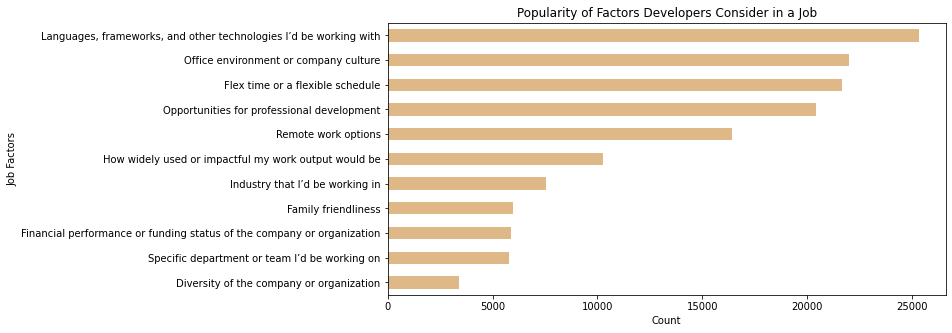

In [106]:
# Number of users voted for JobFactors
ax = job_factors.sum().sort_values(ascending=True).plot(kind="barh", figsize=(10, 5), color='burlywood');
ax.set_xlabel("Count")
ax.set_ylabel("Job Factors")
ax.set_title('Popularity of Factors Developers Consider in a Job');

> Majority of developers make their decisions regarding a job based on the technical languages, frameworks, and other technologies. This should not be surprising, as many other professionals may do the same. Most developers consider office environment and company culture, flex time or a flexible schedule, and opportunities for growth more important in a job consideration. Remote work option is a rising factor for developers when considering a job.

[Back to top](#top)

<a id='conclusion'></a>
## Conclusion

> MySQL, PostgreSQL, and MS SQL Server are the most popular databases. MongoDB and Redis are rising to a higher demand in the next year.

> StackOverflow frequent user is a young male who is a developer by profession with about five years of professional coding experience who also likes to code as a hobby and has been coding for about ten years in general, and is from the North America , India or Europe, has a stable job, but is open to new opportunities.

> When considering a job, developers focus on technical languages, frameworks, and technology that they will be working with. They also value office environment, company culture, flexible time, flexible schedule, professional development, and remote work options.

> Data analysis of the survey results has been educational, as I had to seek out ways to clean and tidy the data to perform the analysis. It also has been exciting to find out the interesting insights. I would be interested in comparing what have changed in the post-pandemic era in developers’ professional and life choices in the upcoming survey.

<a id='acknowledgements'></a>
## Acknowledgements
1. [Stack Overflow Developer Survey 2020](https://insights.stackoverflow.com/survey) - The original survey dataset can be found here.
2. [Data Scientist Survey Analysis - Genevieve Hayes](https://github.com/gkhayes/ds_survey_analysis) - A similar analysis process I found helpful.
3. [Stackoverflow 2018 survey](https://github.com/kedevked/stackoverflow2018-survey) - A similar analysis process I found helpful and used some code in an adjusted form in my analysis.

[Back to top](#top)